### Spotify uses a series of different features to classify tracks. We copy/paste the information from the Spotify Webpage.




- **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


- **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


- **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


- **Instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


- **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.


- **Loudness**: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.


- **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
    
- **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
    
- **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.

***

### Using the cleanedDatasetWithFeatures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm

# Other utilities
from sklearn import datasets, preprocessing, metrics

## Import the data

In [2]:
data = pd.read_csv("../../data/cleanedDatasetWithFeatures.csv")

In [4]:
data.shape

(104561, 20)

In [5]:
data.columns

Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'streams',
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [6]:
# See attribute labels
list(data)

['Unnamed: 0',
 'Unnamed: 0.1',
 'title',
 'rank',
 'date',
 'artist',
 'url',
 'region',
 'streams',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [4]:
data.drop('Unnamed: 0', inplace=True, axis=1)
data.drop('Unnamed: 0.1', inplace=True, axis=1)

In [6]:
data.head()

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,253019.0,0.852,0.773,8.0,-2.921,0.0776,0.187,0.000030,0.1590,0.9070,102.034,195840.0
1,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0
2,ภาพจำ,1,2018-04-12,Pop Pongkool,https://open.spotify.com/track/4YRpjJaJpiI36HM...,Thailand,15477.0,0.557,0.585,5.0,-7.559,0.0470,0.426,0.000001,0.1440,0.4640,81.922,274000.0
3,Te Boté - Remix,1,2018-04-27,"Nio Garcia, Casper Magico, Bad Bunny, Darell, ...",https://open.spotify.com/track/3V8UKqhEK5zBkBb...,Honduras,12869.0,0.903,0.675,11.0,-3.445,0.2140,0.542,0.000013,0.0595,0.4420,96.507,417920.0
4,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0


In [9]:
data.tail()

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
104556,Coraz bliżej Święta,200,2018-11-23,Nosowska,https://open.spotify.com/track/2K6hdg6MKfKrDQB...,Poland,9718.0,0.639,0.727,5.0,-6.985,0.0587,0.0939,0.013200,0.0929,0.447,146.081,205687.0
104557,Ik Heb Je,200,2018-10-26,Maan,https://open.spotify.com/track/2Xqs5ozueApOYZm...,Netherlands,25204.0,0.845,0.559,6.0,-5.171,0.1680,0.3370,0.001710,0.0758,0.628,100.242,176404.0
104558,המנון הלוחם,200,2021-04-23,Hatikva 6,https://open.spotify.com/track/2i1xX8VmwMDtmF7...,Israel,3822.0,0.648,0.668,1.0,-10.186,0.0879,0.0722,0.000000,0.1300,0.848,134.058,195376.0
104559,ครางชื่ออ้ายแน,200,2018-10-27,ศรีจันทร์ วีสี,https://open.spotify.com/track/5ZwxJQ8vR5cHWer...,Thailand,2390.0,0.488,0.687,0.0,-8.530,0.0503,0.1540,0.000001,0.1330,0.553,153.052,215427.0
104560,好久不見的你,200,2017-02-05,施易男,https://open.spotify.com/track/3YRYLUJBuB1epfI...,Taiwan,2005.0,0.382,0.258,4.0,-14.364,0.0349,0.7120,0.000000,0.0993,0.300,137.763,250582.0


# Cleaning data

**Changing "duration_ms" values from milliseconds to minutes**

In [9]:
import time
tic = time.perf_counter()

errors = 0

for index, row in data.iterrows():
    try:
        
        #data.at[index,'danceability'] = float(current['danceability'])
        data.at[index,'duration_m'] = float(int((row['duration_ms']/1000)/60)+(int((row['duration_ms']/1000)%60))/100)
        
        print(str(int(((index+1)/data.shape[0])*100)) + '% done - ' + str(index+1) + ' of ' + str(data.shape[0]) + ' songs iterated - ' + errors + ' encountered.', end='\r')
    except:
        #append error or insert specific values?
        errors = errors+1
        pass
    
        
toc = time.perf_counter()
print(f"Added new rows from external links in {toc - tic:0.4f} seconds")

Added new rows from external links in 4.9164 seconds


In [10]:
data.dtypes

title                object
rank                  int64
date                 object
artist               object
url                  object
region               object
streams             float64
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
dtype: object

In [11]:
data.head()

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,253019.0,0.852,0.773,8.0,-2.921,0.0776,0.187,0.000030,0.1590,0.9070,102.034,195840.0
1,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0
2,ภาพจำ,1,2018-04-12,Pop Pongkool,https://open.spotify.com/track/4YRpjJaJpiI36HM...,Thailand,15477.0,0.557,0.585,5.0,-7.559,0.0470,0.426,0.000001,0.1440,0.4640,81.922,274000.0
3,Te Boté - Remix,1,2018-04-27,"Nio Garcia, Casper Magico, Bad Bunny, Darell, ...",https://open.spotify.com/track/3V8UKqhEK5zBkBb...,Honduras,12869.0,0.903,0.675,11.0,-3.445,0.2140,0.542,0.000013,0.0595,0.4420,96.507,417920.0
4,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0


In [12]:
data.tail()

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
104556,Coraz bliżej Święta,200,2018-11-23,Nosowska,https://open.spotify.com/track/2K6hdg6MKfKrDQB...,Poland,9718.0,0.639,0.727,5.0,-6.985,0.0587,0.0939,0.013200,0.0929,0.447,146.081,205687.0
104557,Ik Heb Je,200,2018-10-26,Maan,https://open.spotify.com/track/2Xqs5ozueApOYZm...,Netherlands,25204.0,0.845,0.559,6.0,-5.171,0.1680,0.3370,0.001710,0.0758,0.628,100.242,176404.0
104558,המנון הלוחם,200,2021-04-23,Hatikva 6,https://open.spotify.com/track/2i1xX8VmwMDtmF7...,Israel,3822.0,0.648,0.668,1.0,-10.186,0.0879,0.0722,0.000000,0.1300,0.848,134.058,195376.0
104559,ครางชื่ออ้ายแน,200,2018-10-27,ศรีจันทร์ วีสี,https://open.spotify.com/track/5ZwxJQ8vR5cHWer...,Thailand,2390.0,0.488,0.687,0.0,-8.530,0.0503,0.1540,0.000001,0.1330,0.553,153.052,215427.0
104560,好久不見的你,200,2017-02-05,施易男,https://open.spotify.com/track/3YRYLUJBuB1epfI...,Taiwan,2005.0,0.382,0.258,4.0,-14.364,0.0349,0.7120,0.000000,0.0993,0.300,137.763,250582.0


**Now we can drop the column containing the milliseconds**

In [29]:
#data.drop('duration_ms', inplace=True, axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104561 entries, 0 to 104560
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             104561 non-null  object 
 1   rank              104561 non-null  int64  
 2   date              104561 non-null  object 
 3   artist            104561 non-null  object 
 4   url               104561 non-null  object 
 5   region            104561 non-null  object 
 6   streams           104561 non-null  float64
 7   danceability      104544 non-null  float64
 8   energy            104544 non-null  float64
 9   key               104544 non-null  float64
 10  loudness          104544 non-null  float64
 11  speechiness       104544 non-null  float64
 12  acousticness      104544 non-null  float64
 13  instrumentalness  104544 non-null  float64
 14  liveness          104544 non-null  float64
 15  valence           104544 non-null  float64
 16  tempo             10

## Creating a popularity

**We are building the popularity on the amount of streams each song has. We are doing this based on the quantiles of the column "streams" in our dataset.**

**We are ranking the popularity from 1 - 5, where a song with the popularity of one is the lowest in popularity and a song with the popularity of 5 is most popular.**

In [31]:
quantiles = data["streams"].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
quantiles

0.0       1001.0
0.2       3944.0
0.4      11936.0
0.6      32783.0
0.8      79883.0
1.0    8611591.0
Name: streams, dtype: float64

In [32]:
quantiles[0.2]

3944.0

In [17]:
import time
tic = time.perf_counter()
counter = 0

for index, row in data.iterrows():
  
    if (row["streams"] <= quantiles[0.2]):
        data.at[index, 'popularity'] = int(1)

    elif (row["streams"] <= quantiles[0.4]) & (row["streams"] > quantiles[0.2]):
        data.at[index, 'popularity'] = int(2)

    elif (row["streams"] <= quantiles[0.6]) & (row["streams"] > quantiles[0.4]):
        data.at[index, 'popularity'] = int(3)

    elif (row["streams"] <= quantiles[0.8]) & (row["streams"] > quantiles[0.6]):
        data.at[index, 'popularity'] = int(4)

    elif (row["streams"] > quantiles[0.8]):
        data.at[index, 'popularity'] = int(5)
       
    # print(str(int(((counter)/data.shape[0])*100)) + '% done - ' + str(counter) + ' of ' + str(data.shape[0]) + ' songs iterated.', end='\r')
    counter = counter+1
                
toc = time.perf_counter()
print(f"Added new rows from external links in {toc - tic:0.4f} seconds")

KeyboardInterrupt: 

In [ ]:
data['popularity'] = data['popularity'].astype(int)

# Looking at the data

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

<AxesSubplot:xlabel='tempo', ylabel='Density'>

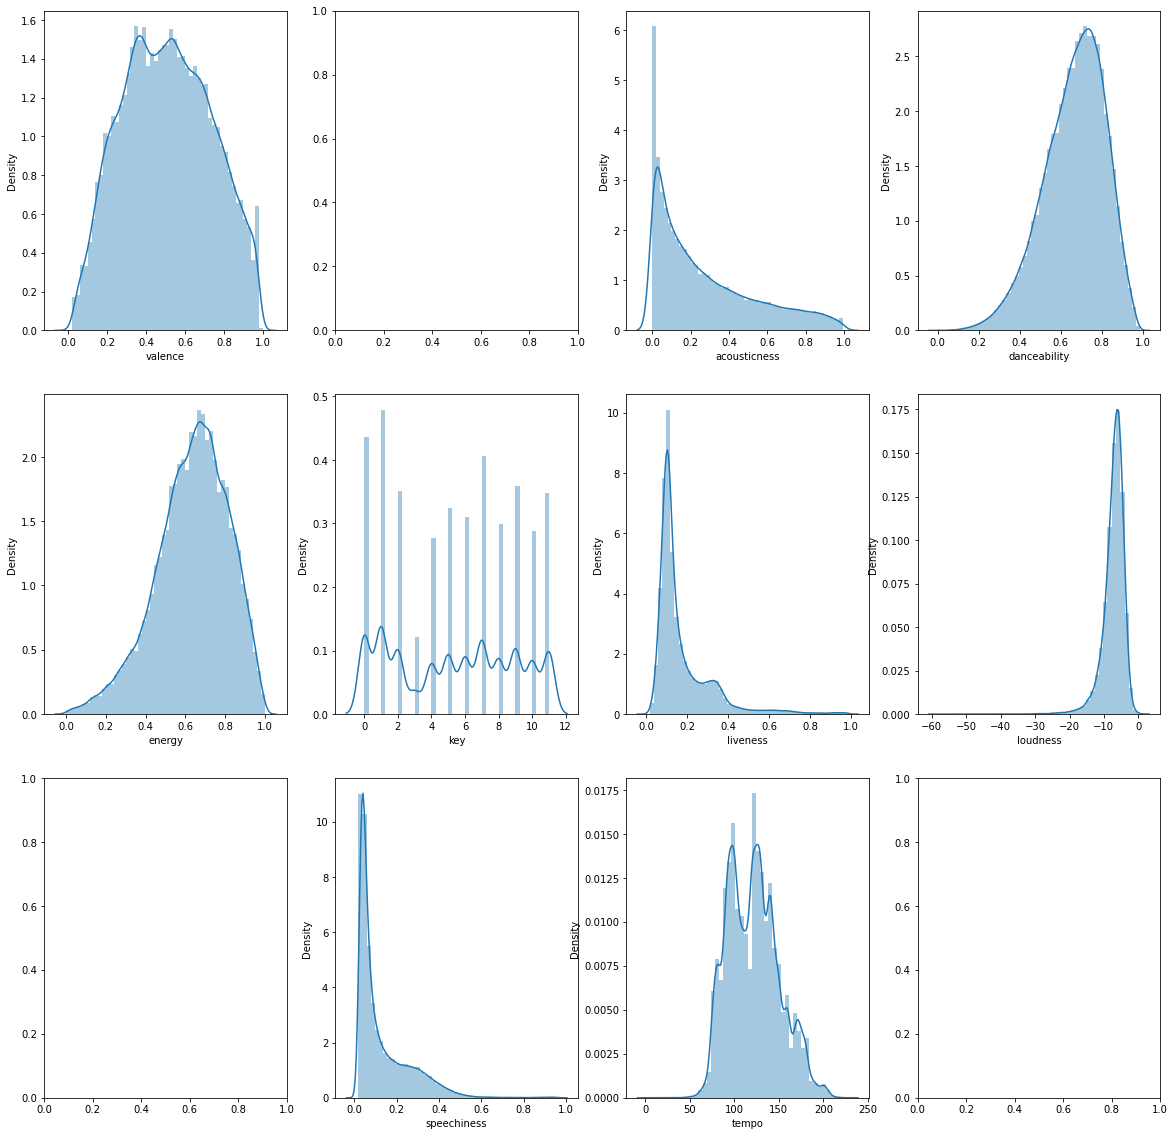

In [15]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(data['valence'],ax=ax[0,0])
sns.distplot(data['acousticness'],ax=ax[0,2])
sns.distplot(data['danceability'],ax=ax[0,3])
sns.distplot(data['duration_ms'],ax=ax[1,2])
sns.distplot(data['energy'],ax=ax[1,0])
sns.distplot(data['key'],ax=ax[1,1])
sns.distplot(data['liveness'],ax=ax[1,2])
sns.distplot(data['loudness'],ax=ax[1,3])
#sns.distplot(data['popularity'],ax=ax[2,0])
sns.distplot(data['speechiness'],ax=ax[2,1])
sns.distplot(data['tempo'],ax=ax[2,2])

<AxesSubplot:>

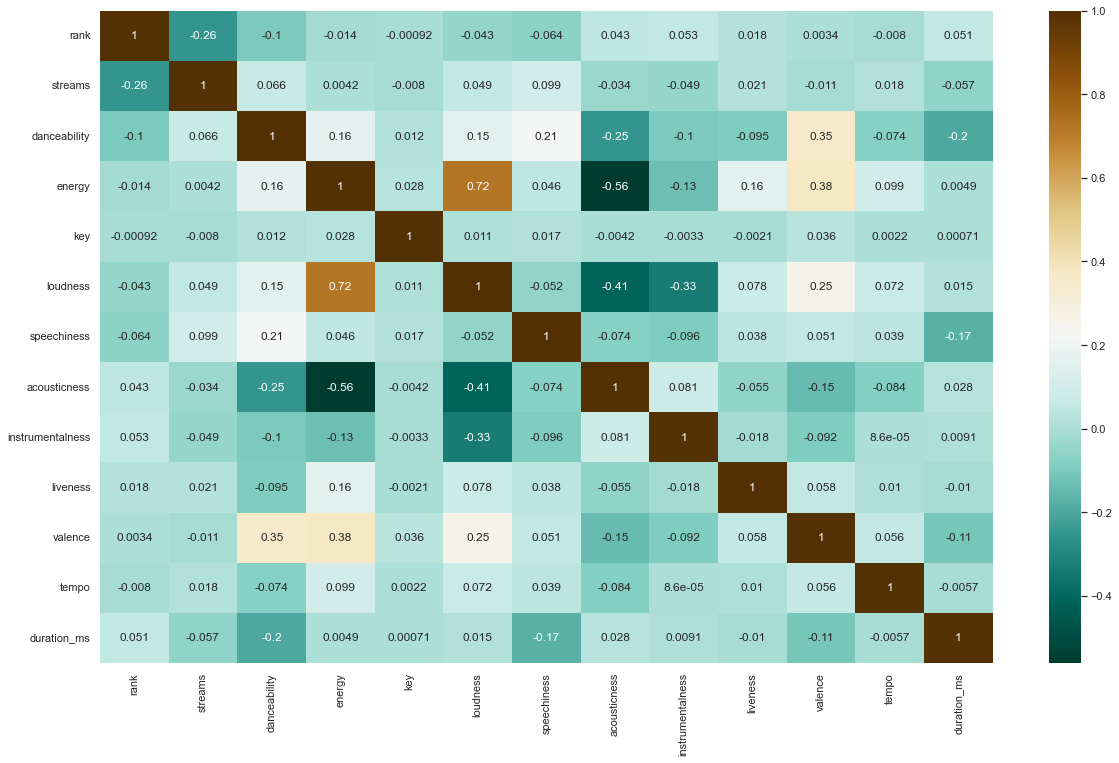

In [16]:
plt.figure(figsize=(20,12))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True, cmap='BrBG_r', annot_kws={"fontsize":12}) # cmap='BrBG_r',

## Getting the most streamed songs

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Streams')

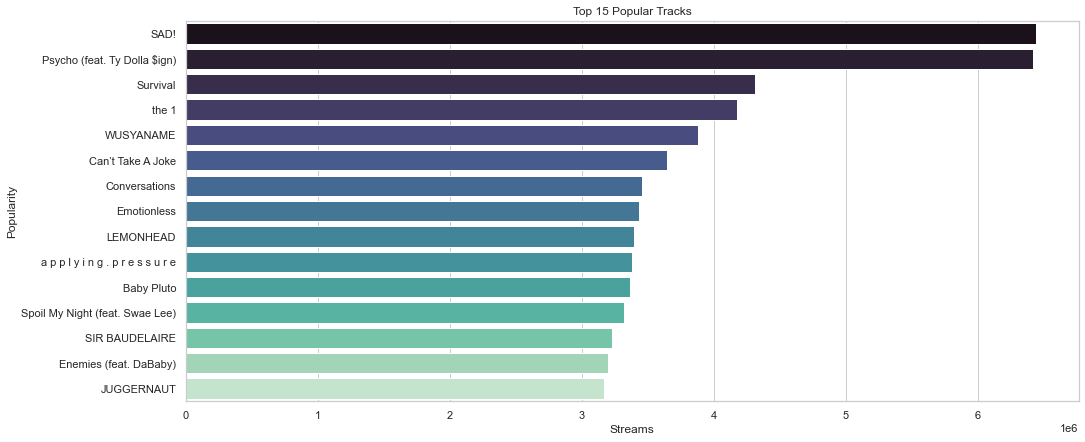

In [17]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = data.groupby("title")['streams'].mean().sort_values(ascending = False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Streams')

In [18]:
data.groupby("title")['streams'].mean().sort_values(ascending=False).head(15)

title
SAD!                                 6439012.0
Psycho (feat. Ty Dolla $ign)         6418506.0
Survival                             4307288.0
the 1                                4175284.0
WUSYANAME                            3876167.0
Can’t Take A Joke                    3642782.0
Conversations                        3452709.0
Emotionless                          3433745.0
LEMONHEAD                            3397137.0
a p p l y i n g . p r e s s u r e    3380786.0
Baby Pluto                           3364245.0
Spoil My Night (feat. Swae Lee)      3318588.0
SIR BAUDELAIRE                       3228838.0
Enemies (feat. DaBaby)               3198197.0
JUGGERNAUT                           3166477.0
Name: streams, dtype: float64

## Getting the most streamed artists

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Streams')

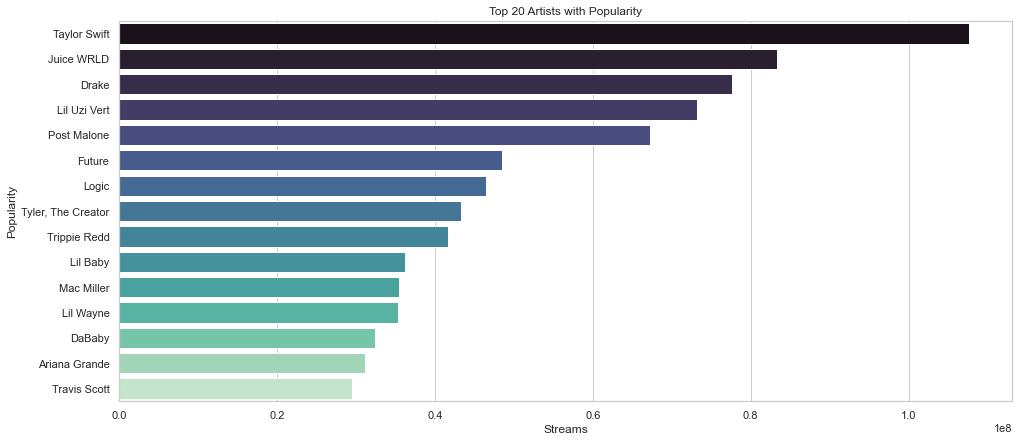

In [19]:
fig, axis = plt.subplots(figsize = (16,7))
popular = data.groupby("artist")['streams'].sum().sort_values(ascending = False).head(15)
axis = sns.barplot(popular, popular.index, palette="mako", orient='h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Streams')

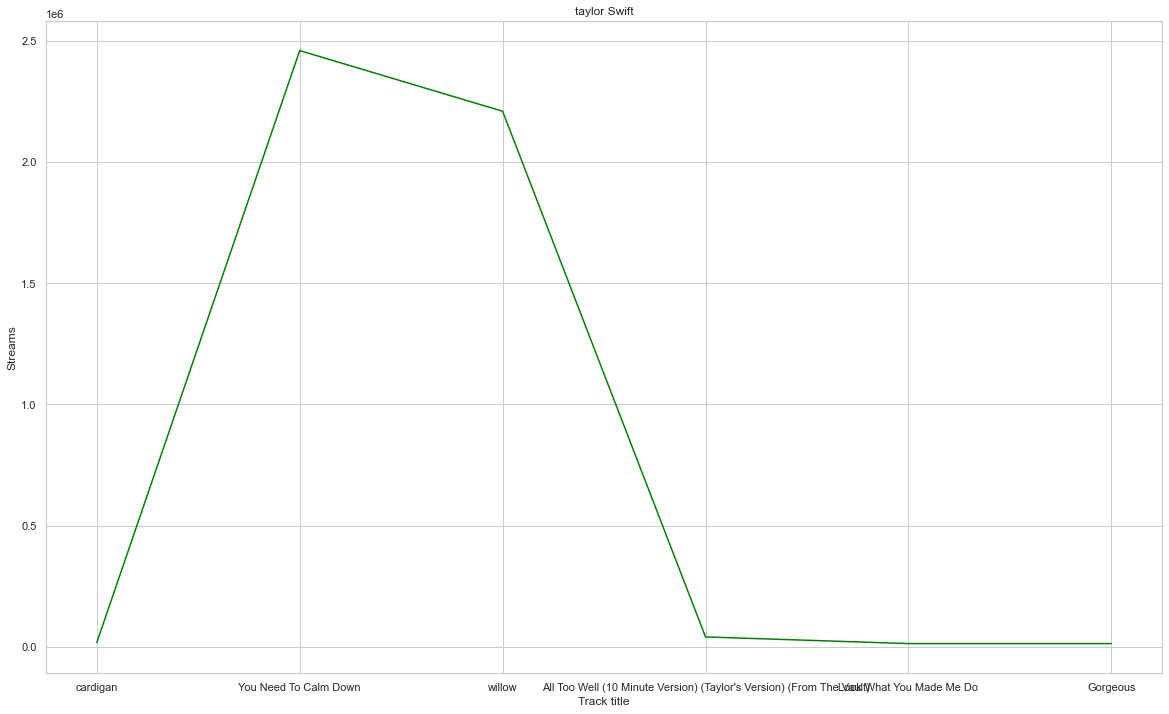

In [27]:
# visualizing the popularity of taylor Swift by her songs
taylor = data[data['artist'] == 'Taylor Swift'].head(6)
plt.rcParams['figure.figsize'] = (20,12)

sns.lineplot(x='title', y='streams', data=taylor, color='green')
# Labels
plt.title("taylor Swift")
plt.xlabel('Track title')
plt.ylabel('Streams')
plt.show()

## Trying to predict where it will end up on a ranking

In [48]:
#Libraries to pre-process the variables
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/master/data/data_moods.csv")

In [50]:
df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


# Predicting the mood with neural network training

In [51]:
#Libraries to create the Multi-class Neural Network

#!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

In [52]:
#Define the features and the target
col_features = df.columns[6:-3]

X = df[col_features]
Y = df['mood']

#Normalize the features
X= MinMaxScaler().fit_transform(X)

#Encode the labels (targets)
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)

#Split train and test data with a test size of 20%
X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15) 


A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

***

A Sequential model is not appropriate when:

    - Your model has multiple inputs or multiple outputs
    - Any of your layers has multiple inputs or multiple outputs
    - You need to do layer sharing
    - You want non-linear topology (e.g. a residual connection, a multi-branch model)


**Creating "target" to assign int values to the mood categories**

In [53]:
target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [54]:
# Creating a function that will create the structure of the Neural Network

def base():
    #The model
    model = Sequential()
    
    # Adding 8 nodes in the 1. layer, the input of 4 dimentions with a relu function
    model.add(Dense(8, input_dim=10, activation='relu'))
    
    #Add a layer with 3 outputs and a softmax function
    model.add(Dense(4, activation='softmax'))
    
    #Compile our model with a loss function and (adam) optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#Configure the estimator with 300 epochs and 200 batchs. the build_fn takes the function defined above.

estimator= KerasClassifier(build_fn=base, epochs=300, batch_size=200) #-> Gives an accuracy of 81%
# estimator= KerasClassifier(build_fn=base, epochs=400, batch_size=200) -> Gives an accuracy of 79.7%
#estimator= KerasClassifier(build_fn=base, epochs=600, batch_size=400) -> Gives an accuracy of 80% 

C:\Users\Nmtur\AppData\Local\Temp/ipykernel_25476/2187190837.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator= KerasClassifier(build_fn=base, epochs=300, batch_size=200) #-> Gives an accuracy of 81%


https://www.baeldung.com/cs/epoch-neural-networks <- epochs explained

In [55]:
# library to evaluate the model
from sklearn.model_selection import cross_val_score, KFold

In [56]:
# Evaluate the model
kfold = KFold(n_splits=10, shuffle=True)
result = cross_val_score(estimator, X, encoded_y, cv=kfold)

print("%.2f%% (%.2f%%)" % (result.mean()*100,result.std()*100))

Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 71us/sample - loss: 1.4343 - acc: 0.3549
Epoch 2/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4256 - acc: 0.3647
Epoch 3/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4175 - acc: 0.3793
Epoch 4/300
617/617 [==============================] - 0s 5us/sample - loss: 1.4100 - acc: 0.3890
Epoch 5/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4030 - acc: 0.3938
Epoch 6/300
617/617 [==============================] - 0s 6us/sample - loss: 1.3960 - acc: 0.4036
Epoch 7/300
617/617 [==============================] - 0s 6us/sample - loss: 1.3890 - acc: 0.4149
Epoch 8/300
617/617 [==============================] - 0s 6us/sample - loss: 1.3824 - acc: 0.4198
Epoch 9/300
617/617 [==============================] - 0s 8us/sample - loss: 1.3758 - acc: 0.4279
Epoch 10/300
617/617 [==============================] - 0s 6us/sample - loss: 1.3693 - acc: 0.43

617/617 [==============================] - 0s 6us/sample - loss: 0.5895 - acc: 0.8006
Epoch 166/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5879 - acc: 0.8006
Epoch 167/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5861 - acc: 0.8120
Epoch 168/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5846 - acc: 0.8120
Epoch 169/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5832 - acc: 0.8169
Epoch 170/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5822 - acc: 0.8120
Epoch 171/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5810 - acc: 0.8104
Epoch 172/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5795 - acc: 0.8088
Epoch 173/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5776 - acc: 0.8152
Epoch 174/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5754 - acc: 0.8201
Epoch 175/300


617/617 [==============================] - 0s 5us/sample - loss: 0.5041 - acc: 0.8185
Epoch 248/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5034 - acc: 0.8185
Epoch 249/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5027 - acc: 0.8185
Epoch 250/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5021 - acc: 0.8185
Epoch 251/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5016 - acc: 0.8185
Epoch 252/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5009 - acc: 0.8185
Epoch 253/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5002 - acc: 0.8201
Epoch 254/300
617/617 [==============================] - 0s 6us/sample - loss: 0.4993 - acc: 0.8201
Epoch 255/300
617/617 [==============================] - 0s 5us/sample - loss: 0.4985 - acc: 0.8169
Epoch 256/300
617/617 [==============================] - 0s 6us/sample - loss: 0.4979 - acc: 0.8185
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 1/300
617/617 [==============================] - 0s 75us/sample - loss: 1.4324 - acc: 0.4263
Epoch 2/300
617/617 [==============================] - 0s 5us/sample - loss: 1.4206 - acc: 0.4392
Epoch 3/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4098 - acc: 0.4425
Epoch 4/300
617/617 [==============================] - 0s 5us/sample - loss: 1.3996 - acc: 0.4473
Epoch 5/300
617/617 [==============================] - 0s 6us/sample - loss: 1.3902 - acc: 0.4489
Epoch 6/300
617/617 [==============================] - 0s 5us/sample - loss: 1.3815 - acc: 0.4522
Epoch 7/300
617/617 [==============================] - 0s 6us/sample - loss: 1.3733 - acc: 0.4538
Epoch 8/300
617/617 [==============================] - 0s 6us/sample - loss: 1.3658 - acc: 0.4554
Epoch 9/300
617/617 [==============================] - 0s 5us/sample - loss: 1.3586 - acc: 0.4538
Epoch 10/300
617/617 [==============================] - 0s 5us/sample - loss: 1.3520 - acc: 0.4538
Epoch 11/300
617/6

617/617 [==============================] - 0s 5us/sample - loss: 0.6728 - acc: 0.7699
Epoch 166/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6706 - acc: 0.7650
Epoch 167/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6686 - acc: 0.7650
Epoch 168/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6666 - acc: 0.7666
Epoch 169/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6648 - acc: 0.7682
Epoch 170/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6629 - acc: 0.7682
Epoch 171/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6611 - acc: 0.7715
Epoch 172/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6592 - acc: 0.7699
Epoch 173/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6573 - acc: 0.7699
Epoch 174/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6553 - acc: 0.7699
Epoch 175/300


617/617 [==============================] - 0s 6us/sample - loss: 0.5559 - acc: 0.7942
Epoch 248/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5550 - acc: 0.7942
Epoch 249/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5540 - acc: 0.7958
Epoch 250/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5530 - acc: 0.7974
Epoch 251/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5519 - acc: 0.7974
Epoch 252/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5509 - acc: 0.7893
Epoch 253/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5508 - acc: 0.7861
Epoch 254/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5504 - acc: 0.7861
Epoch 255/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5498 - acc: 0.7844
Epoch 256/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5488 - acc: 0.7844
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 1/300
617/617 [==============================] - 0s 75us/sample - loss: 1.5650 - acc: 0.1248
Epoch 2/300
617/617 [==============================] - 0s 5us/sample - loss: 1.5495 - acc: 0.1199
Epoch 3/300
617/617 [==============================] - 0s 6us/sample - loss: 1.5354 - acc: 0.1280
Epoch 4/300
617/617 [==============================] - 0s 5us/sample - loss: 1.5215 - acc: 0.1394
Epoch 5/300
617/617 [==============================] - 0s 5us/sample - loss: 1.5080 - acc: 0.1491
Epoch 6/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4951 - acc: 0.1605
Epoch 7/300
617/617 [==============================] - 0s 5us/sample - loss: 1.4823 - acc: 0.1637
Epoch 8/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4703 - acc: 0.1767
Epoch 9/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4592 - acc: 0.1977
Epoch 10/300
617/617 [==============================] - 0s 5us/sample - loss: 1.4483 - acc: 0.2026
Epoch 11/300
617/6

617/617 [==============================] - 0s 5us/sample - loss: 0.7390 - acc: 0.7147
Epoch 166/300
617/617 [==============================] - 0s 6us/sample - loss: 0.7369 - acc: 0.7147
Epoch 167/300
617/617 [==============================] - 0s 5us/sample - loss: 0.7349 - acc: 0.7131
Epoch 168/300
617/617 [==============================] - 0s 6us/sample - loss: 0.7329 - acc: 0.7099
Epoch 169/300
617/617 [==============================] - 0s 6us/sample - loss: 0.7310 - acc: 0.7099
Epoch 170/300
617/617 [==============================] - 0s 5us/sample - loss: 0.7290 - acc: 0.7099
Epoch 171/300
617/617 [==============================] - 0s 6us/sample - loss: 0.7270 - acc: 0.7115
Epoch 172/300
617/617 [==============================] - 0s 5us/sample - loss: 0.7250 - acc: 0.7131
Epoch 173/300
617/617 [==============================] - 0s 6us/sample - loss: 0.7233 - acc: 0.7131
Epoch 174/300
617/617 [==============================] - 0s 5us/sample - loss: 0.7214 - acc: 0.7131
Epoch 175/300


617/617 [==============================] - 0s 6us/sample - loss: 0.6197 - acc: 0.7504
Epoch 248/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6185 - acc: 0.7488
Epoch 249/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6175 - acc: 0.7488
Epoch 250/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6166 - acc: 0.7488
Epoch 251/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6156 - acc: 0.7472
Epoch 252/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6146 - acc: 0.7455
Epoch 253/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6136 - acc: 0.7455
Epoch 254/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6124 - acc: 0.7439
Epoch 255/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6114 - acc: 0.7439
Epoch 256/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6104 - acc: 0.7455
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 1/300
617/617 [==============================] - 0s 78us/sample - loss: 1.4937 - acc: 0.1977
Epoch 2/300
617/617 [==============================] - 0s 8us/sample - loss: 1.4829 - acc: 0.1977
Epoch 3/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4731 - acc: 0.1977
Epoch 4/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4638 - acc: 0.1961
Epoch 5/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4544 - acc: 0.1929
Epoch 6/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4454 - acc: 0.1848
Epoch 7/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4369 - acc: 0.1750
Epoch 8/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4289 - acc: 0.1734
Epoch 9/300
617/617 [==============================] - 0s 8us/sample - loss: 1.4217 - acc: 0.1669
Epoch 10/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4145 - acc: 0.1686
Epoch 11/300
617/6

617/617 [==============================] - 0s 5us/sample - loss: 0.6307 - acc: 0.7812
Epoch 166/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6291 - acc: 0.7844
Epoch 167/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6273 - acc: 0.7861
Epoch 168/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6255 - acc: 0.7877
Epoch 169/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6240 - acc: 0.7958
Epoch 170/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6222 - acc: 0.8006
Epoch 171/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6205 - acc: 0.8039
Epoch 172/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6188 - acc: 0.7990
Epoch 173/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6170 - acc: 0.8006
Epoch 174/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6153 - acc: 0.7942
Epoch 175/300


617/617 [==============================] - 0s 5us/sample - loss: 0.5339 - acc: 0.8104
Epoch 248/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5331 - acc: 0.8104
Epoch 249/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5324 - acc: 0.8104
Epoch 250/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5317 - acc: 0.8136
Epoch 251/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5307 - acc: 0.8152
Epoch 252/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5301 - acc: 0.8185
Epoch 253/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5295 - acc: 0.8169
Epoch 254/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5288 - acc: 0.8169
Epoch 255/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5280 - acc: 0.8152
Epoch 256/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5273 - acc: 0.8152
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 1/300
617/617 [==============================] - 0s 78us/sample - loss: 1.7470 - acc: 0.2075
Epoch 2/300
617/617 [==============================] - 0s 5us/sample - loss: 1.7145 - acc: 0.2075
Epoch 3/300
617/617 [==============================] - 0s 5us/sample - loss: 1.6847 - acc: 0.2107
Epoch 4/300
617/617 [==============================] - 0s 6us/sample - loss: 1.6557 - acc: 0.2123
Epoch 5/300
617/617 [==============================] - 0s 5us/sample - loss: 1.6284 - acc: 0.2188
Epoch 6/300
617/617 [==============================] - 0s 6us/sample - loss: 1.6015 - acc: 0.2431
Epoch 7/300
617/617 [==============================] - 0s 6us/sample - loss: 1.5765 - acc: 0.2723
Epoch 8/300
617/617 [==============================] - 0s 5us/sample - loss: 1.5529 - acc: 0.3063
Epoch 9/300
617/617 [==============================] - 0s 6us/sample - loss: 1.5311 - acc: 0.3355
Epoch 10/300
617/617 [==============================] - 0s 6us/sample - loss: 1.5104 - acc: 0.3614
Epoch 11/300
617/6

617/617 [==============================] - 0s 6us/sample - loss: 0.6451 - acc: 0.7828
Epoch 166/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6431 - acc: 0.7861
Epoch 167/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6413 - acc: 0.7828
Epoch 168/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6396 - acc: 0.7844
Epoch 169/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6378 - acc: 0.7828
Epoch 170/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6361 - acc: 0.7828
Epoch 171/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6343 - acc: 0.7828
Epoch 172/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6325 - acc: 0.7812
Epoch 173/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6307 - acc: 0.7861
Epoch 174/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6287 - acc: 0.7893
Epoch 175/300


617/617 [==============================] - 0s 6us/sample - loss: 0.5360 - acc: 0.8071
Epoch 248/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5350 - acc: 0.8088
Epoch 249/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5342 - acc: 0.8120
Epoch 250/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5333 - acc: 0.8120
Epoch 251/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5324 - acc: 0.8071
Epoch 252/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5315 - acc: 0.8055
Epoch 253/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5307 - acc: 0.8071
Epoch 254/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5301 - acc: 0.8055
Epoch 255/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5293 - acc: 0.8055
Epoch 256/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5283 - acc: 0.8071
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 79us/sample - loss: 1.4487 - acc: 0.2609
Epoch 2/300
617/617 [==============================] - 0s 5us/sample - loss: 1.4394 - acc: 0.2658
Epoch 3/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4306 - acc: 0.2690
Epoch 4/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4222 - acc: 0.2626
Epoch 5/300
617/617 [==============================] - 0s 6us/sample - loss: 1.4146 - acc: 0.2723
Epoch 6/300
617/617 [==============================] - 0s 5us/sample - loss: 1.4071 - acc: 0.2804
Epoch 7/300
617/617 [==============================] - 0s 6us/sample - loss: 1.3999 - acc: 0.2820
Epoch 8/300
617/617 [==============================] - 0s 6us/sample - loss: 1.3931 - acc: 0.2820
Epoch 9/300
617/617 [==============================] - 0s 6us/sample - loss: 1.3866 - acc: 0.2885
Epoch 10/300
617/617 [==============================] - 0s 5us/sample - loss: 1.3799 - acc: 0.28

617/617 [==============================] - 0s 6us/sample - loss: 0.6706 - acc: 0.7585
Epoch 166/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6687 - acc: 0.7601
Epoch 167/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6668 - acc: 0.7585
Epoch 168/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6646 - acc: 0.7601
Epoch 169/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6627 - acc: 0.7585
Epoch 170/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6607 - acc: 0.7601
Epoch 171/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6589 - acc: 0.7634
Epoch 172/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6576 - acc: 0.7650
Epoch 173/300
617/617 [==============================] - 0s 6us/sample - loss: 0.6557 - acc: 0.7634
Epoch 174/300
617/617 [==============================] - 0s 5us/sample - loss: 0.6541 - acc: 0.7634
Epoch 175/300


617/617 [==============================] - 0s 6us/sample - loss: 0.5677 - acc: 0.7715
Epoch 248/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5670 - acc: 0.7763
Epoch 249/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5664 - acc: 0.7731
Epoch 250/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5656 - acc: 0.7731
Epoch 251/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5650 - acc: 0.7715
Epoch 252/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5644 - acc: 0.7747
Epoch 253/300
617/617 [==============================] - 0s 8us/sample - loss: 0.5636 - acc: 0.7715
Epoch 254/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5631 - acc: 0.7715
Epoch 255/300
617/617 [==============================] - 0s 6us/sample - loss: 0.5625 - acc: 0.7699
Epoch 256/300
617/617 [==============================] - 0s 5us/sample - loss: 0.5617 - acc: 0.7715
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 81us/sample - loss: 1.5343 - acc: 0.2443
Epoch 2/300
618/618 [==============================] - 0s 6us/sample - loss: 1.5167 - acc: 0.2540
Epoch 3/300
618/618 [==============================] - 0s 6us/sample - loss: 1.5010 - acc: 0.2621
Epoch 4/300
618/618 [==============================] - 0s 5us/sample - loss: 1.4862 - acc: 0.2718
Epoch 5/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4714 - acc: 0.2848
Epoch 6/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4575 - acc: 0.2913
Epoch 7/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4447 - acc: 0.2929
Epoch 8/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4333 - acc: 0.2994
Epoch 9/300
618/618 [==============================] - 0s 5us/sample - loss: 1.4229 - acc: 0.3010
Epoch 10/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4131 - acc: 0.31

618/618 [==============================] - 0s 6us/sample - loss: 0.6529 - acc: 0.7864
Epoch 166/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6507 - acc: 0.7848
Epoch 167/300
618/618 [==============================] - 0s 5us/sample - loss: 0.6487 - acc: 0.7832
Epoch 168/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6465 - acc: 0.7832
Epoch 169/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6442 - acc: 0.7832
Epoch 170/300
618/618 [==============================] - 0s 5us/sample - loss: 0.6421 - acc: 0.7848
Epoch 171/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6399 - acc: 0.7848
Epoch 172/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6377 - acc: 0.7880
Epoch 173/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6358 - acc: 0.7929
Epoch 174/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6338 - acc: 0.7945
Epoch 175/300


618/618 [==============================] - 0s 6us/sample - loss: 0.5346 - acc: 0.7977
Epoch 248/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5336 - acc: 0.8010
Epoch 249/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5327 - acc: 0.7994
Epoch 250/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5317 - acc: 0.8010
Epoch 251/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5307 - acc: 0.8042
Epoch 252/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5299 - acc: 0.8058
Epoch 253/300
618/618 [==============================] - 0s 5us/sample - loss: 0.5294 - acc: 0.8091
Epoch 254/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5289 - acc: 0.8074
Epoch 255/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5279 - acc: 0.8042
Epoch 256/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5267 - acc: 0.8058
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 83us/sample - loss: 1.5461 - acc: 0.2265
Epoch 2/300
618/618 [==============================] - 0s 6us/sample - loss: 1.5256 - acc: 0.2298
Epoch 3/300
618/618 [==============================] - 0s 6us/sample - loss: 1.5075 - acc: 0.2330
Epoch 4/300
618/618 [==============================] - 0s 5us/sample - loss: 1.4900 - acc: 0.2379
Epoch 5/300
618/618 [==============================] - 0s 5us/sample - loss: 1.4740 - acc: 0.2395
Epoch 6/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4593 - acc: 0.2427
Epoch 7/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4447 - acc: 0.2460
Epoch 8/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4313 - acc: 0.2427
Epoch 9/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4181 - acc: 0.2524
Epoch 10/300
618/618 [==============================] - 0s 8us/sample - loss: 1.4058 - acc: 0.26

618/618 [==============================] - 0s 6us/sample - loss: 0.6366 - acc: 0.7864
Epoch 166/300
618/618 [==============================] - 0s 5us/sample - loss: 0.6349 - acc: 0.7896
Epoch 167/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6327 - acc: 0.7929
Epoch 168/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6308 - acc: 0.7848
Epoch 169/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6290 - acc: 0.7799
Epoch 170/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6273 - acc: 0.7751
Epoch 171/300
618/618 [==============================] - 0s 5us/sample - loss: 0.6258 - acc: 0.7751
Epoch 172/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6241 - acc: 0.7751
Epoch 173/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6225 - acc: 0.7783
Epoch 174/300
618/618 [==============================] - 0s 5us/sample - loss: 0.6207 - acc: 0.7767
Epoch 175/300


618/618 [==============================] - 0s 5us/sample - loss: 0.5373 - acc: 0.7977
Epoch 248/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5368 - acc: 0.7945
Epoch 249/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5363 - acc: 0.7961
Epoch 250/300
618/618 [==============================] - 0s 5us/sample - loss: 0.5356 - acc: 0.7977
Epoch 251/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5350 - acc: 0.7929
Epoch 252/300
618/618 [==============================] - 0s 5us/sample - loss: 0.5342 - acc: 0.7864
Epoch 253/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5333 - acc: 0.7848
Epoch 254/300
618/618 [==============================] - 0s 5us/sample - loss: 0.5323 - acc: 0.7929
Epoch 255/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5315 - acc: 0.7961
Epoch 256/300
618/618 [==============================] - 0s 5us/sample - loss: 0.5307 - acc: 0.7961
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 87us/sample - loss: 1.3766 - acc: 0.2848
Epoch 2/300
618/618 [==============================] - 0s 6us/sample - loss: 1.3690 - acc: 0.2913
Epoch 3/300
618/618 [==============================] - 0s 6us/sample - loss: 1.3617 - acc: 0.2945
Epoch 4/300
618/618 [==============================] - 0s 6us/sample - loss: 1.3544 - acc: 0.2977
Epoch 5/300
618/618 [==============================] - 0s 6us/sample - loss: 1.3471 - acc: 0.3074
Epoch 6/300
618/618 [==============================] - 0s 6us/sample - loss: 1.3399 - acc: 0.3204
Epoch 7/300
618/618 [==============================] - 0s 6us/sample - loss: 1.3328 - acc: 0.3236
Epoch 8/300
618/618 [==============================] - 0s 6us/sample - loss: 1.3257 - acc: 0.3366
Epoch 9/300
618/618 [==============================] - 0s 8us/sample - loss: 1.3185 - acc: 0.3479
Epoch 10/300
618/618 [==============================] - 0s 6us/sample - loss: 1.3115 - acc: 0.36

618/618 [==============================] - 0s 6us/sample - loss: 0.7196 - acc: 0.7298
Epoch 166/300
618/618 [==============================] - 0s 8us/sample - loss: 0.7177 - acc: 0.7282
Epoch 167/300
618/618 [==============================] - 0s 6us/sample - loss: 0.7159 - acc: 0.7298
Epoch 168/300
618/618 [==============================] - 0s 6us/sample - loss: 0.7141 - acc: 0.7265
Epoch 169/300
618/618 [==============================] - 0s 6us/sample - loss: 0.7123 - acc: 0.7265
Epoch 170/300
618/618 [==============================] - 0s 8us/sample - loss: 0.7105 - acc: 0.7265
Epoch 171/300
618/618 [==============================] - 0s 5us/sample - loss: 0.7087 - acc: 0.7265
Epoch 172/300
618/618 [==============================] - 0s 6us/sample - loss: 0.7069 - acc: 0.7265
Epoch 173/300
618/618 [==============================] - 0s 6us/sample - loss: 0.7051 - acc: 0.7282
Epoch 174/300
618/618 [==============================] - 0s 6us/sample - loss: 0.7034 - acc: 0.7282
Epoch 175/300


618/618 [==============================] - 0s 5us/sample - loss: 0.6124 - acc: 0.7379
Epoch 248/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6114 - acc: 0.7395
Epoch 249/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6106 - acc: 0.7379
Epoch 250/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6097 - acc: 0.7379
Epoch 251/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6088 - acc: 0.7379
Epoch 252/300
618/618 [==============================] - 0s 5us/sample - loss: 0.6079 - acc: 0.7379
Epoch 253/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6074 - acc: 0.7379
Epoch 254/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6064 - acc: 0.7379
Epoch 255/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6056 - acc: 0.7379
Epoch 256/300
618/618 [==============================] - 0s 5us/sample - loss: 0.6047 - acc: 0.7427
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 89us/sample - loss: 1.4644 - acc: 0.1327
Epoch 2/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4545 - acc: 0.1359
Epoch 3/300
618/618 [==============================] - 0s 8us/sample - loss: 1.4454 - acc: 0.1472
Epoch 4/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4369 - acc: 0.1586
Epoch 5/300
618/618 [==============================] - 0s 5us/sample - loss: 1.4285 - acc: 0.1748
Epoch 6/300
618/618 [==============================] - 0s 8us/sample - loss: 1.4209 - acc: 0.1877
Epoch 7/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4132 - acc: 0.2006
Epoch 8/300
618/618 [==============================] - 0s 6us/sample - loss: 1.4060 - acc: 0.2104
Epoch 9/300
618/618 [==============================] - 0s 6us/sample - loss: 1.3989 - acc: 0.2233
Epoch 10/300
618/618 [==============================] - 0s 6us/sample - loss: 1.3922 - acc: 0.23

618/618 [==============================] - 0s 6us/sample - loss: 0.6952 - acc: 0.7346
Epoch 166/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6921 - acc: 0.7346
Epoch 167/300
618/618 [==============================] - 0s 8us/sample - loss: 0.6890 - acc: 0.7362
Epoch 168/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6859 - acc: 0.7346
Epoch 169/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6831 - acc: 0.7362
Epoch 170/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6802 - acc: 0.7330
Epoch 171/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6777 - acc: 0.7330
Epoch 172/300
618/618 [==============================] - 0s 5us/sample - loss: 0.6748 - acc: 0.7314
Epoch 173/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6721 - acc: 0.7314
Epoch 174/300
618/618 [==============================] - 0s 6us/sample - loss: 0.6696 - acc: 0.7314
Epoch 175/300


618/618 [==============================] - 0s 5us/sample - loss: 0.5623 - acc: 0.7524
Epoch 248/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5613 - acc: 0.7524
Epoch 249/300
618/618 [==============================] - 0s 8us/sample - loss: 0.5605 - acc: 0.7508
Epoch 250/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5602 - acc: 0.7443
Epoch 251/300
618/618 [==============================] - 0s 5us/sample - loss: 0.5595 - acc: 0.7427
Epoch 252/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5592 - acc: 0.7460
Epoch 253/300
618/618 [==============================] - 0s 5us/sample - loss: 0.5582 - acc: 0.7476
Epoch 254/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5570 - acc: 0.7476
Epoch 255/300
618/618 [==============================] - 0s 6us/sample - loss: 0.5559 - acc: 0.7540
Epoch 256/300
618/618 [==============================] - 0s 5us/sample - loss: 0.5550 - acc: 0.7573
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


**Through our model with the cross validation, we can see that the average of each fold (K = 10) -> (kfold = KFold(n_splits=10, shuffle=True)) our accuracy is 78%**

## Training the model

In [57]:
# Using the train data to train our model
estimator.fit(X_train, Y_train)

# Predicting the model with our test data
y_predict = estimator.predict(X_test)

Train on 548 samples
Epoch 1/300
548/548 [==============================] - 0s 99us/sample - loss: 1.5087 - acc: 0.1971
Epoch 2/300
548/548 [==============================] - 0s 5us/sample - loss: 1.4960 - acc: 0.1971
Epoch 3/300
548/548 [==============================] - 0s 7us/sample - loss: 1.4833 - acc: 0.1934
Epoch 4/300
548/548 [==============================] - 0s 5us/sample - loss: 1.4713 - acc: 0.1934
Epoch 5/300
548/548 [==============================] - 0s 5us/sample - loss: 1.4592 - acc: 0.1953
Epoch 6/300
548/548 [==============================] - 0s 5us/sample - loss: 1.4476 - acc: 0.1971
Epoch 7/300
548/548 [==============================] - 0s 5us/sample - loss: 1.4370 - acc: 0.1916
Epoch 8/300
548/548 [==============================] - 0s 5us/sample - loss: 1.4260 - acc: 0.1898
Epoch 9/300
548/548 [==============================] - 0s 7us/sample - loss: 1.4156 - acc: 0.1898
Epoch 10/300
548/548 [==============================] - 0s 7us/sample - loss: 1.4051 - acc: 0.19

548/548 [==============================] - 0s 7us/sample - loss: 0.7159 - acc: 0.7609
Epoch 166/300
548/548 [==============================] - 0s 7us/sample - loss: 0.7138 - acc: 0.7609
Epoch 167/300
548/548 [==============================] - 0s 5us/sample - loss: 0.7116 - acc: 0.7628
Epoch 168/300
548/548 [==============================] - 0s 7us/sample - loss: 0.7096 - acc: 0.7628
Epoch 169/300
548/548 [==============================] - 0s 7us/sample - loss: 0.7076 - acc: 0.7646
Epoch 170/300
548/548 [==============================] - 0s 5us/sample - loss: 0.7056 - acc: 0.7646
Epoch 171/300
548/548 [==============================] - 0s 7us/sample - loss: 0.7036 - acc: 0.7682
Epoch 172/300
548/548 [==============================] - 0s 7us/sample - loss: 0.7016 - acc: 0.7682
Epoch 173/300
548/548 [==============================] - 0s 5us/sample - loss: 0.6996 - acc: 0.7664
Epoch 174/300
548/548 [==============================] - 0s 7us/sample - loss: 0.6977 - acc: 0.7682
Epoch 175/300


548/548 [==============================] - 0s 5us/sample - loss: 0.5791 - acc: 0.7956
Epoch 248/300
548/548 [==============================] - 0s 7us/sample - loss: 0.5776 - acc: 0.7974
Epoch 249/300
548/548 [==============================] - 0s 7us/sample - loss: 0.5762 - acc: 0.7956
Epoch 250/300
548/548 [==============================] - 0s 5us/sample - loss: 0.5747 - acc: 0.7974
Epoch 251/300
548/548 [==============================] - 0s 7us/sample - loss: 0.5734 - acc: 0.7974
Epoch 252/300
548/548 [==============================] - 0s 5us/sample - loss: 0.5719 - acc: 0.7974
Epoch 253/300
548/548 [==============================] - 0s 7us/sample - loss: 0.5706 - acc: 0.7993
Epoch 254/300
548/548 [==============================] - 0s 5us/sample - loss: 0.5692 - acc: 0.7993
Epoch 255/300
548/548 [==============================] - 0s 7us/sample - loss: 0.5678 - acc: 0.7993
Epoch 256/300
548/548 [==============================] - 0s 5us/sample - loss: 0.5665 - acc: 0.7974
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


# Accuracy of the Neural network

### Confusion matrix

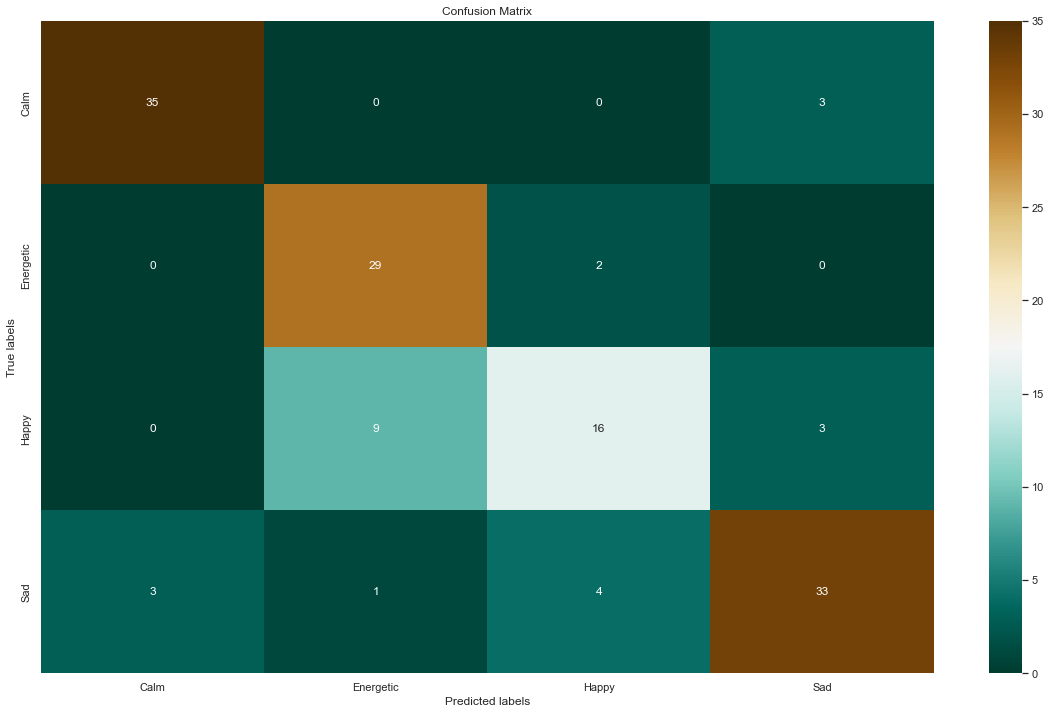

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion matrix based on the test data and our prediction
confus = confusion_matrix(Y_test, y_predict)

#plot the confusion matrix
ax = plt.subplot()
sns.heatmap(confus,annot=True,ax=ax, cmap='BrBG_r')
labels = target['mood'].tolist()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [59]:
print("Accuracy Score",accuracy_score(Y_test,y_predict))

Accuracy Score 0.8188405797101449


# Predicting a new song

In [40]:
#track_string.columns[7:-1][0]
track_nr = 1
def getTrack(track_nr):
    columns = ['artist', 'song', 'length', 'danceability','acousticness','energy','instrumentalness',
               'liveness', 'valence', 'loudness','speechiness','tempo']
    values = [(data.iat[track_nr, 3]),(data.iat[track_nr, 0]),(data.iat[track_nr, -1]),(data.iat[track_nr, 7]),
              (data.iat[track_nr, 12]),(data.iat[track_nr, 8]),(data.iat[track_nr, 13]),
              (data.iat[track_nr, 14]),(data.iat[track_nr, 15]),(data.iat[track_nr, 10]),
              (data.iat[track_nr, 11]),(data.iat[track_nr, 16])]
    
    return values, columns

In [42]:
getTrack(1)

(['Luis Fonsi',
  'Despacito (Featuring Daddy Yankee)',
  228200.0,
  0.66,
  0.209,
  0.786,
  0.0,
  0.112,
  0.846,
  -4.757,
  0.17,
  177.833],
 ['artist',
  'song',
  'length',
  'danceability',
  'acousticness',
  'energy',
  'instrumentalness',
  'liveness',
  'valence',
  'loudness',
  'speechiness',
  'tempo'])

In [43]:
from sklearn.pipeline import Pipeline

feature_array = np.array(df[col_features])


def predict_song_mood(nr):
    runner = Pipeline([('minmaxscalar', MinMaxScaler()), ('keras', KerasClassifier(build_fn=base, epochs=300, batch_size=200))])
    
    # Fit
    runner.fit(feature_array, encoded_y)
    
    # Get song features
    track_string = getTrack(nr)
    
    # Get song and artist
    artist = track_string[0][0]
    song_name = track_string[0][1]
    
     # Getting the features to input into the Model
    preds_features = np.array(track_string[0][2:]).reshape(-1,1).T
    
    # Predict the features
    result = runner.predict(preds_features)
    mood = np.array(target['mood'][target['encode'] == int(result)])
    

    
    result_pred=print(song_name + " by " + artist + " is a " + mood + " song!")
    

In [69]:
predict_song_mood(11)

Train on 686 samples


C:\Users\Nmtur\AppData\Local\Temp/ipykernel_25476/2156815552.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  runner = Pipeline([('minmaxscalar', MinMaxScaler()), ('keras', KerasClassifier(build_fn=base, epochs=300, batch_size=200))])


Epoch 1/300
686/686 [==============================] - 0s 88us/sample - loss: 1.6230 - acc: 0.0583
Epoch 2/300
686/686 [==============================] - 0s 6us/sample - loss: 1.6072 - acc: 0.0641
Epoch 3/300
686/686 [==============================] - 0s 7us/sample - loss: 1.5917 - acc: 0.0671
Epoch 4/300
686/686 [==============================] - 0s 6us/sample - loss: 1.5765 - acc: 0.0700
Epoch 5/300
686/686 [==============================] - 0s 6us/sample - loss: 1.5619 - acc: 0.0773
Epoch 6/300
686/686 [==============================] - 0s 7us/sample - loss: 1.5476 - acc: 0.0904
Epoch 7/300
686/686 [==============================] - 0s 7us/sample - loss: 1.5333 - acc: 0.0948
Epoch 8/300
686/686 [==============================] - 0s 6us/sample - loss: 1.5199 - acc: 0.1006
Epoch 9/300
686/686 [==============================] - 0s 7us/sample - loss: 1.5066 - acc: 0.1181
Epoch 10/300
686/686 [==============================] - 0s 6us/sample - loss: 1.4934 - acc: 0.1224
Epoch 11/300
686/6

686/686 [==============================] - 0s 7us/sample - loss: 0.6610 - acc: 0.7813
Epoch 166/300
686/686 [==============================] - 0s 7us/sample - loss: 0.6588 - acc: 0.7813
Epoch 167/300
686/686 [==============================] - 0s 6us/sample - loss: 0.6566 - acc: 0.7813
Epoch 168/300
686/686 [==============================] - 0s 6us/sample - loss: 0.6544 - acc: 0.7828
Epoch 169/300
686/686 [==============================] - 0s 6us/sample - loss: 0.6523 - acc: 0.7828
Epoch 170/300
686/686 [==============================] - 0s 7us/sample - loss: 0.6501 - acc: 0.7813
Epoch 171/300
686/686 [==============================] - 0s 7us/sample - loss: 0.6479 - acc: 0.7843
Epoch 172/300
686/686 [==============================] - 0s 6us/sample - loss: 0.6459 - acc: 0.7843
Epoch 173/300
686/686 [==============================] - 0s 6us/sample - loss: 0.6437 - acc: 0.7857
Epoch 174/300
686/686 [==============================] - 0s 7us/sample - loss: 0.6416 - acc: 0.7857
Epoch 175/300


686/686 [==============================] - 0s 6us/sample - loss: 0.5369 - acc: 0.8017
Epoch 248/300
686/686 [==============================] - 0s 6us/sample - loss: 0.5360 - acc: 0.8032
Epoch 249/300
686/686 [==============================] - 0s 6us/sample - loss: 0.5351 - acc: 0.8032
Epoch 250/300
686/686 [==============================] - 0s 6us/sample - loss: 0.5342 - acc: 0.8061
Epoch 251/300
686/686 [==============================] - 0s 6us/sample - loss: 0.5334 - acc: 0.8061
Epoch 252/300
686/686 [==============================] - 0s 6us/sample - loss: 0.5325 - acc: 0.8076
Epoch 253/300
686/686 [==============================] - 0s 6us/sample - loss: 0.5316 - acc: 0.8061
Epoch 254/300
686/686 [==============================] - 0s 4us/sample - loss: 0.5307 - acc: 0.8047
Epoch 255/300
686/686 [==============================] - 0s 7us/sample - loss: 0.5299 - acc: 0.8047
Epoch 256/300
686/686 [==============================] - 0s 6us/sample - loss: 0.5290 - acc: 0.8061
Epoch 257/300


C:\tools\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


# Saving model

In [66]:
# For serialization and deserialization of data from/to file
# from sklearn.externals import joblib
import joblib
joblib.dump(base, '../../saved_models/moodPredickter.pkl')

['../../saved_models/moodPredickter.pkl']